In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym

# First case

Reaction occures in both directions. 
$k_f$ and $k_r$ correspond to the forward and reverse reaction constants.
For the following chemical reaction:
\begin{align}
  A+B \longleftrightarrow AB \\
\end{align}

The reaction rates are given by:
\begin{align}
 r1 = k_f &\cdot[A]\cdot[B] \\[1em]
 r2 = k_r&\cdot[AB] \\[1em]
\end{align}


# Initial parameters

In [ ]:
t0 = 0
tf = 1
kf = 0.05
kr = 0.005
X0 = np.array([[800],#A
                [400],#B
                [100]])#AB
X = np.zeros((3,1))
X[:,] = X0
T = np.array([t0])

V = np.array([[-1],
              [-1],
              [1]])

# Reaction simulation

In [ ]:
while T[-1] < tf:
    r1 = kf*X[0,-1]*X[1,-1]
    r2 = kr*X[2,-1]
    R = r1+r2


    #tau = 1/R*np.log(1/f1)
    tau = np.random.exponential(scale=1/R)
    T = np.append(T, T[-1]+tau)

    #rand = np.random.uniform(0,1)
    rand = np.random.choice(2, p=[r1/R, r2/R])
    #if rand*R <= r1:
    if rand ==0:
        X = np.append(X, X[:,[-1]]+V, axis=1)
    else:
        X = np.append(X, X[:,[-1]]-V, axis=1)

In [ ]:
def simulate(T,X):
  while T[-1] < tf:
    r1 = kf*X[0,-1]*X[1,-1]
    r2 = kr*X[2,-1]
    R = r1+r2


    #tau = 1/R*np.log(1/f1)
    tau = np.random.exponential(scale=1/R)
    T = np.append(T, T[-1]+tau)

    #rand = np.random.uniform(0,1)
    rand = np.random.choice(2, p=[r1/R, r2/R])
    #if rand*R <= r1:
    if rand ==0:
        X = np.append(X, X[:,[-1]]+V, axis=1)
    else:
        X = np.append(X, X[:,[-1]]-V, axis=1)

  return X[:,[-1]]

# Plots

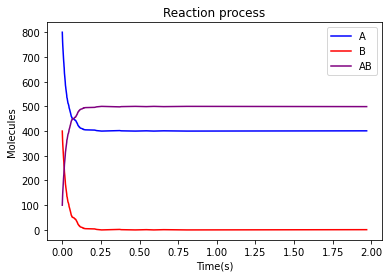

In [ ]:
plt.plot(T, X[0,:], label='A', c='b')
plt.plot(T, X[1,:], label='B', c='r')
plt.plot(T, X[2,:], label='AB', c='purple')
plt.xlabel('Time(s)')
plt.ylabel('Molecules')
plt.title('Reaction process')
plt.legend()
plt.show()

In [ ]:
times = 100
Yi = np.empty((3,1))
for i in range(times):
  Yi = np.append(Yi, simulate(T,X), axis=1)

In [ ]:
Yi.mean(axis=1)# mean for A, B, AB

array([397.02970297,   1.26732673, 494.5519802 ])

# Stochastic model

In [ ]:
t0 = 0
tf = 5
kf = 1
kr = 0.01
k2 = 5
X0 = np.array([[10],#E
                [200],#S
                [0],#ES
                [0]])# P

X = np.zeros(X0.shape)
X[:,] = X0
T = np.array([t0])

V1 = np.array([[-1],
              [-1],
              [1],
              [0]])
V2 = np.array([[1],
              [0],
              [-1],
              [1]])

V0 = np.zeros((4,1))

In [ ]:
def simulate2(T,X, kf,kr,k2):
  while T[-1] < tf:
    r1 = kf*X[0,-1]*X[1,-1]# gets zero
    r_1 = kr*X[2,-1]
    r2 = k2*X[2,-1]
    R = r1+r_1+r2

    
    try:
      rand = np.random.choice(a=3, p=[r1/R, r_1/R, r2/R])
    except RuntimeWarning:
      print(r1/R, r_1/R, r2/R)
    except ValueError:
      break
      
    
    tau = np.random.exponential(scale=1/R)
    T = np.append(T, T[-1]+tau)


    if rand ==0:
        X = np.append(X, X[:,[-1]]+V1, axis=1)
    elif rand ==1:
        X = np.append(X, X[:,[-1]]-V1, axis=1)
    else:
        X = np.append(X, X[:,[-1]]+V2, axis=1)
  return T, X

In [ ]:
Tn,Xn = simulate2(T,X, kf,kr,k2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


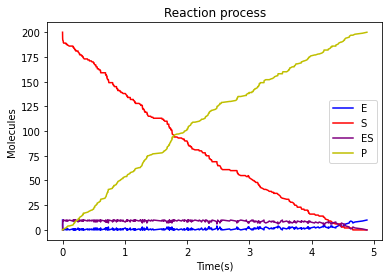

In [ ]:
plt.plot(Tn, Xn[0,:], label='E', c='b')
plt.plot(Tn, Xn[1,:], label='S', c='r')
plt.plot(Tn, Xn[2,:], label='ES', c='purple')
plt.plot(Tn, Xn[3,:], label='P', c='y')

plt.xlabel('Time(s)')
plt.ylabel('Molecules')
plt.title('Reaction process')
plt.legend()
plt.show()

# Analytical method

In [ ]:
from scipy.integrate import odeint

In [ ]:
X0 = np.array([10,200,0,0])

In [ ]:
def reactionEqn(Y, T, k1, k_1, k2):
  E, S, ES, P = Y
  dydt = [-k1*E*S +(k_1+k2)*ES, 
          -k1*E*S+k_1*ES,
          k1*E*S - (k_1+k2)*ES,
          k2*ES]
  return dydt

In [ ]:
sol = odeint(reactionEqn, X0, Tn, args=(kf,kr,k2))

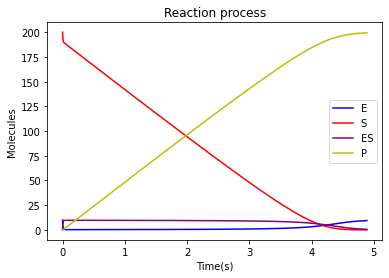

In [ ]:
plt.plot(Tn, sol[:,0], label='E', c='b')
plt.plot(Tn, sol[:,1], label='S', c='r')
plt.plot(Tn, sol[:,2], label='ES', c='purple')
plt.plot(Tn, sol[:,3], label='P', c='y')

plt.xlabel('Time(s)')
plt.ylabel('Molecules')
plt.title('Reaction process')
plt.legend()
plt.show()

# Compare analytical vs stochastic

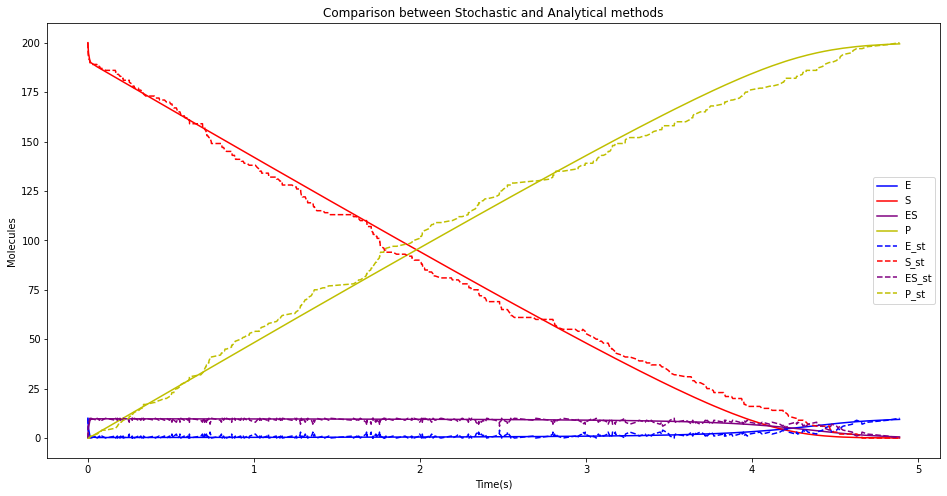

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(Tn, sol[:,0], label='E', c='b')
plt.plot(Tn, sol[:,1], label='S', c='r')
plt.plot(Tn, sol[:,2], label='ES', c='purple')
plt.plot(Tn, sol[:,3], label='P', c='y')


plt.plot(Tn, Xn[0,:], label='E_st', c='b', linestyle = 'dashed')
plt.plot(Tn, Xn[1,:], label='S_st', c='r', linestyle = 'dashed')
plt.plot(Tn, Xn[2,:], label='ES_st', c='purple', linestyle = 'dashed')
plt.plot(Tn, Xn[3,:], label='P_st', c='y', linestyle = 'dashed')


plt.xlabel('Time(s)')
plt.ylabel('Molecules')
plt.title('Comparison between Stochastic and Analytical methods')
plt.legend()
plt.show()